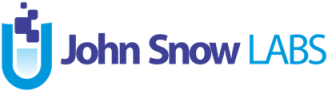

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/test-specific-notebooks/Accuracy_Demo.ipynb)


**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install langtest

# John Snow Labs setup

In [ ]:
!pip install johnsnowlabs

# Harness and its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [3]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>



| Parameter     | Description |
| -- | - |
| **task**      | Task for which the model is to be evaluated (text-classification or ner) |
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |


<br/>
<br/>

# Accuracy Testing

Accuracy testing is a crucial step in evaluating the performance of a machine learning model. It involves measuring how well the model can correctly predict outcomes on a test dataset, which it has not seen before. The accuracy of a model is determined by comparing its predicted output with the actual output. To support the accuracy testing process, several accuracy tests are available. These tests aim to evaluate various aspects of a model's performance both labelwise such as its precision, recall, F1 score and overall like micro F1 score, macro F1 score, and weighted F1 score.


# Accuracy Tests

**`Supported Accuracy tests :`**

- **`min_precision_score`**: Determine if the actual precision score is less than the desired precision score.

- **`min_recall_score`**:  Determine if the actual recall score is less than the desired recall score.

- **`min_f1_score`**: Determine if the actual f1 score is less than the desired f1 score.

- **`min_micro_f1_score`**:  Determine if the actual micro-f1 score is less than the desired micro-f1 score.

- **`min_macro_f1_score`**:  Determine if the actual macro-f1 score is less than the desired macro-f1 score.

- **`min_weighted_f1_score`**:  Determine if the actual min-weighted-f1 score is less than the desired min-weighted-f1 score.

## Testing accuracy of a pretrained NER model/pipeline

Testing a model's accuracy gives us an idea of how well the model performs.

We can directly pass a pretrained model/pipeline from hub as the model parameter in harness and run the tests.

### Test Configuration

Test configuration can be passed in the form of a YAML file as shown below or using .configure() method


**Config YAML format** :
```yaml
tests:     
  defaults:
    min_pass_rate: 0.65
  accuracy:
    min_f1_score:
      min_score: 0.60
    min_precision_score:
      O: 0.60
      PER: 0.60
      LOC: 0.60
```

If config file is not present, we can also use the **.configure()** method to manually configure the harness to perform the needed tests.


In [4]:
harness = Harness(task='ner', model= {"model": "ner.dl", "hub": "johnsnowlabs"})

recognize_entities_dl download started this may take some time.
Approx size to download 159 MB
[OK!]
Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "american_to_british": {
    "min_pass_rate": 0.7
   }
  },
  "accuracy": {
   "min_micro_f1_score": {
    "min_score": 0.7
   }
  },
  "bias": {
   "replace_to_female_pronouns": {
    "min_pass_rate": 0.7
   },
   "replace_to_low_income_country": {
    "min_pass_rate": 0.7
   }
  },
  "fairness": {
   "min_gender_f1_score": {
    "min_score": 0.6
   }
  },
  "representation": {
   "min_label_representation_count": {
    "min_count": 50
   }
  }
 }
}


We can use the .configure() method to manually configure the tests we want to perform.

In [5]:
harness.configure({
  'tests': {
    'defaults': {'min_pass_rate':0.5},

    'accuracy': {
      'min_micro_f1_score': {'min_score': 0.70},
      'min_f1_score': {'min_score': 0.60},
      'min_precision_score': {
        'min_score': {
          'O': 0.5,
          'LOC': 0.8
        }
      }
    }
  }
})

{'tests': {'defaults': {'min_pass_rate': 0.5},
  'accuracy': {'min_micro_f1_score': {'min_score': 0.7},
   'min_f1_score': {'min_score': 0.6},
   'min_precision_score': {'min_score': {'O': 0.5, 'LOC': 0.8}}}}}

Here we have configured the harness to perform three bias tests (min_micro_f1_score, min_f1_score and min_precision_score) and defined the minimum scores for each test. You can see that we can give one score for all labels (check min_f1_score) or a score to each label (check min_precision_score).


### Generating the test cases.




In [6]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 6204.59it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

In [7]:
harness.testcases()

,category,test_type,original,test_case
0,accuracy,min_micro_f1_score,-,micro
1,accuracy,min_f1_score,-,PER
2,accuracy,min_f1_score,-,MISC
3,accuracy,min_f1_score,-,LOC
4,accuracy,min_f1_score,-,ORG
5,accuracy,min_f1_score,-,O
6,accuracy,min_precision_score,-,LOC
7,accuracy,min_precision_score,-,O


harness.testcases() method gives the produced test cases in form of a pandas data frame.

### Running the tests

In [8]:
harness.run()

Running testcases... : 100%|██████████| 8/8 [00:13<00:00,  1.70s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

In [9]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,pass
0,accuracy,min_micro_f1_score,-,micro,0.7,0.988138,True
1,accuracy,min_f1_score,-,PER,0.6,0.983871,True
2,accuracy,min_f1_score,-,MISC,0.6,0.946565,True
3,accuracy,min_f1_score,-,LOC,0.6,0.953020,True
4,accuracy,min_f1_score,-,ORG,0.6,0.869565,True
5,accuracy,min_f1_score,-,O,0.6,0.998389,True
6,accuracy,min_precision_score,-,LOC,0.8,0.972603,True
7,accuracy,min_precision_score,-,O,0.5,0.998389,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Report of the tests

In [10]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,accuracy,min_micro_f1_score,0,1,100%,50%,True
1,accuracy,min_f1_score,0,5,100%,50%,True
2,accuracy,min_precision_score,0,2,100%,50%,True


Called after harness.run() and it summarizes the results giving information about pass and fail counts and overall test pass/fail flag.